In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lr = LinearRegression()  
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
path1 = 'C:\\Users\\Dorris\\Desktop\\concrete.csv'
data = pd.read_csv(path1)

In [3]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
data.isnull().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

cement


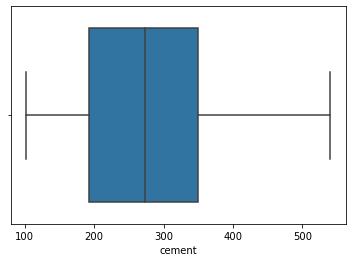

slag


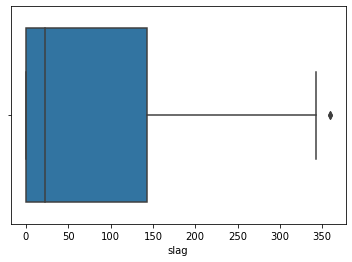

ash


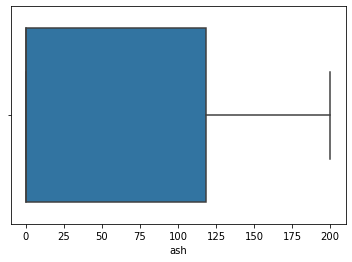

water


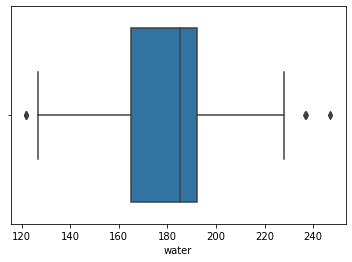

superplastic


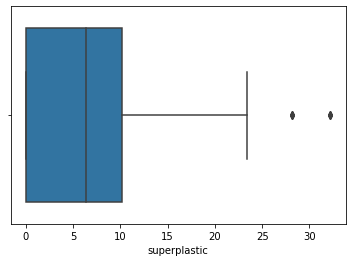

coarseagg


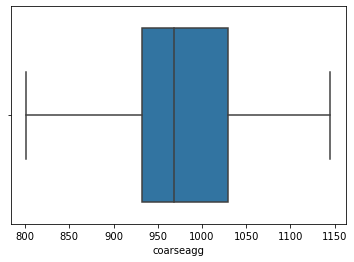

fineagg


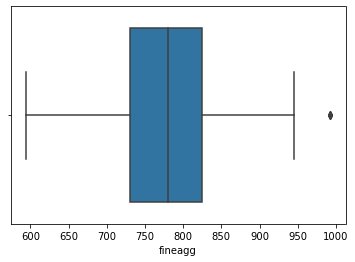

age


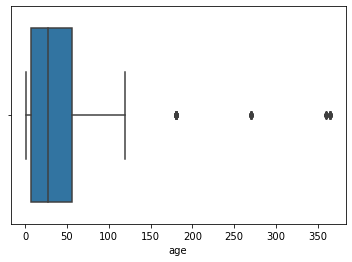

strength


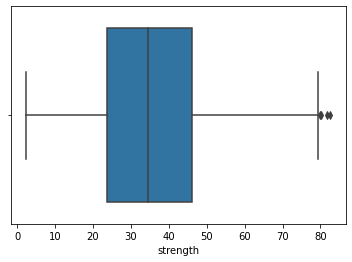

In [8]:
l = list(data.columns.values) 
for col in l:
    
    sns.boxplot(data[col])
    print(col)
    plt.show()

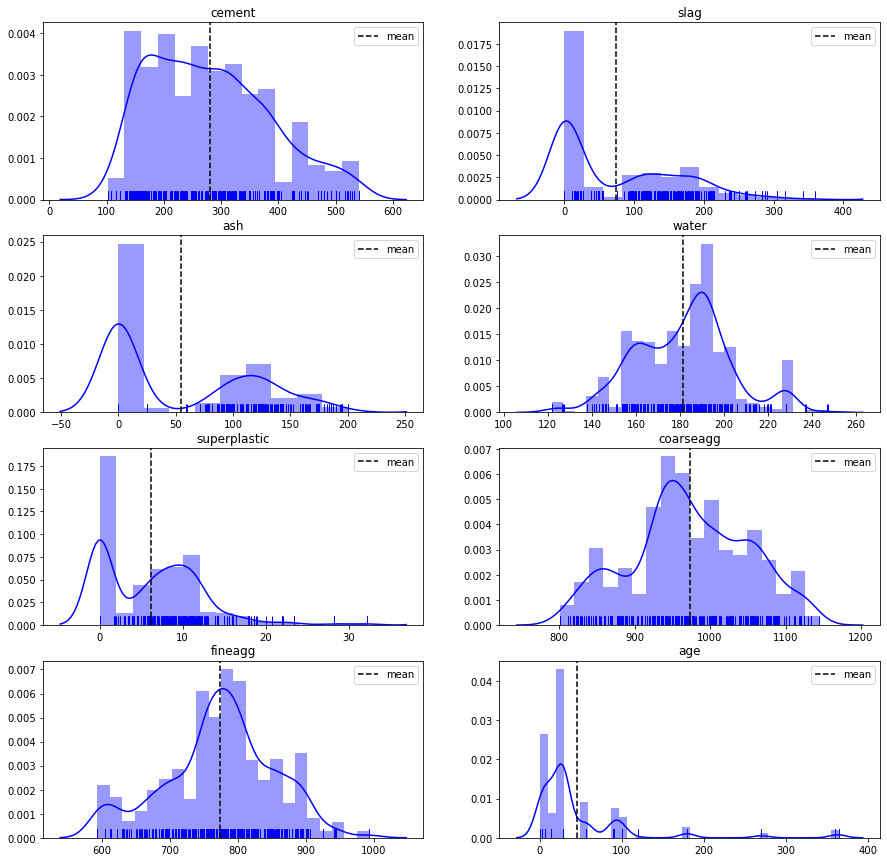

In [9]:
import itertools

cols = [i for i in data.columns if i != 'strength']

fig = plt.figure(figsize=(15, 15))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(data[i],color='blue',rug=True)
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

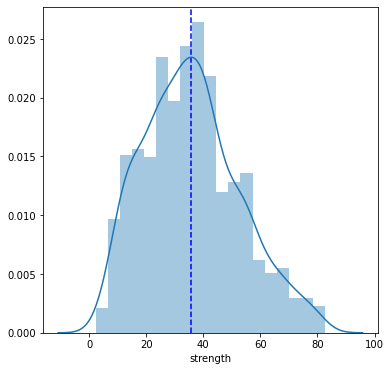

In [11]:
fig = plt.figure(figsize=(6, 6))
plt.axvline(data.strength.mean(),linestyle="dashed",label="mean", color='blue')
sns.distplot(data.strength);

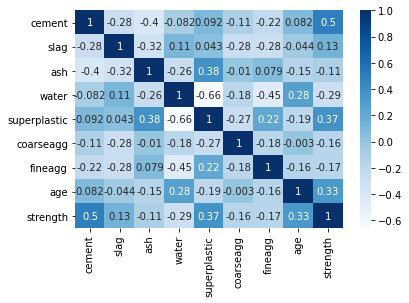

In [12]:
corr = data.corr()
sns.heatmap(corr, annot = True, cmap='Blues')

In [13]:
#Findings
#1. there is a high positive correlation between strength and cement.age and super plastic also influence strength.
#2. there is a strong negative correlation between superplastic and water.
#3. there is posotove correlations between superplastic and ash,fineagg.

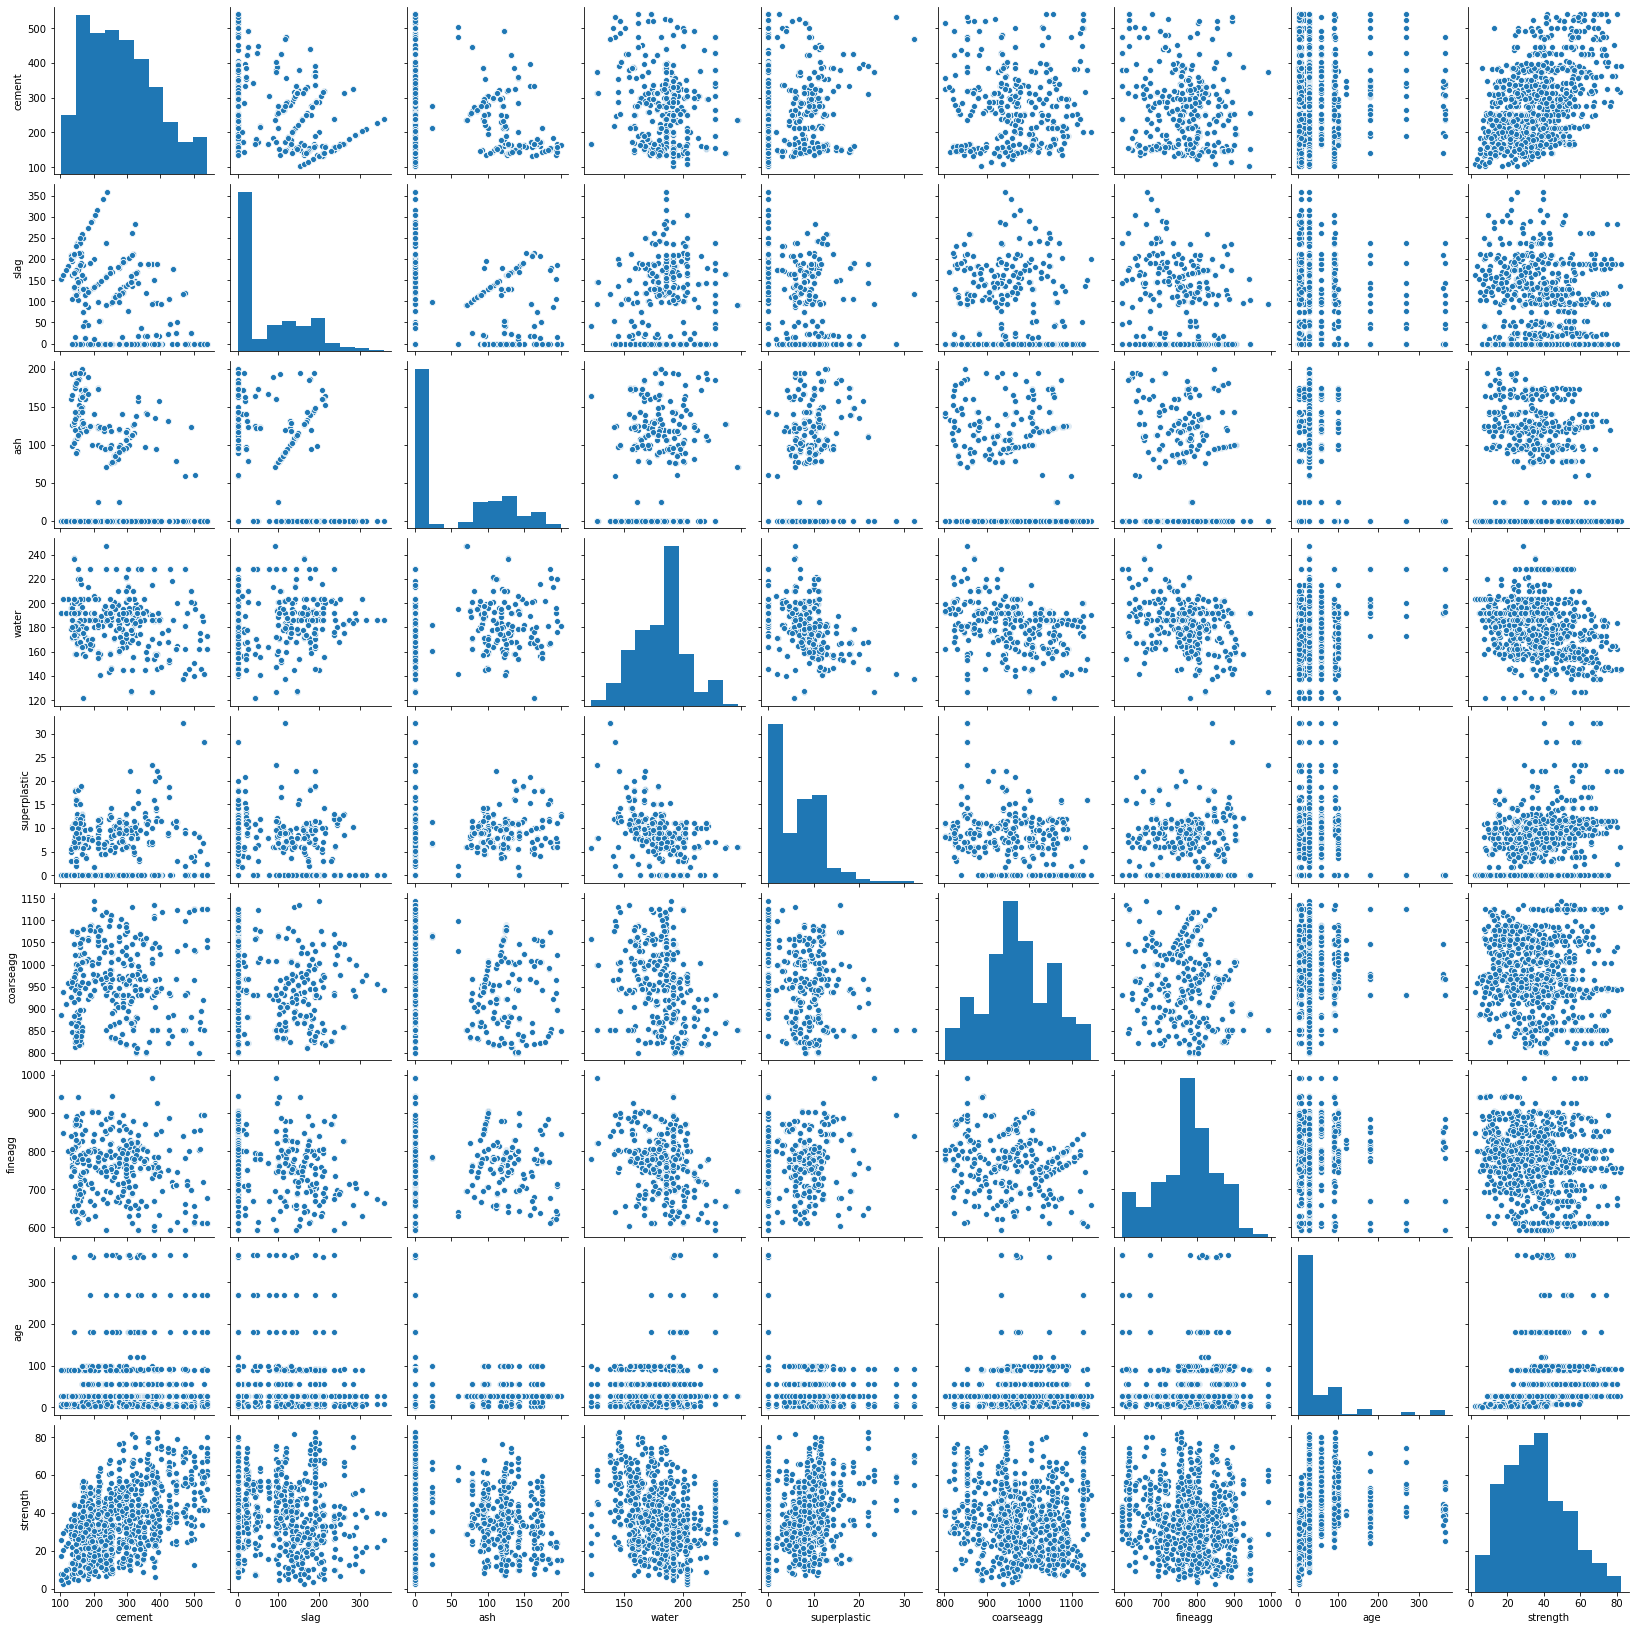

In [14]:
sns.pairplot(data)

In [15]:
from sklearn.cluster import KMeans

data_copy = data.copy(deep=True)
tmp_df = data_copy[['ash', 'superplastic', 'slag']]

cluster_range = range( 2, 15 ) 
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(tmp_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,5.168372e+06
1,3,2.869576e+06
2,4,1.758353e+06
3,5,1.037805e+06
4,6,8.026013e+05
5,7,6.077207e+05
6,8,4.930320e+05
7,9,4.202263e+05
8,10,3.647152e+05
9,11,3.057436e+05


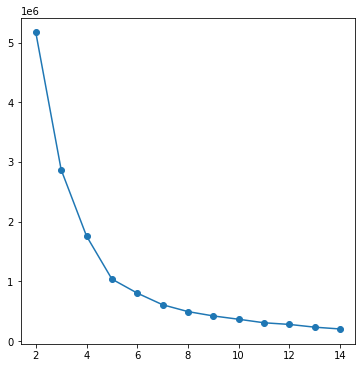

In [17]:
plt.figure(figsize=(6,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );


In [18]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

tmp_df_z = tmp_df.apply(zscore)

cluster = KMeans( n_clusters = 5, random_state = 2354 )
cluster.fit(tmp_df_z)

prediction=cluster.predict(tmp_df_z)
data_copy["group"] = prediction 

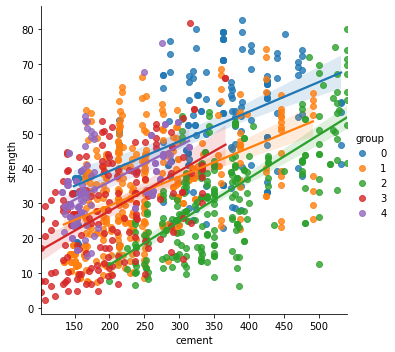

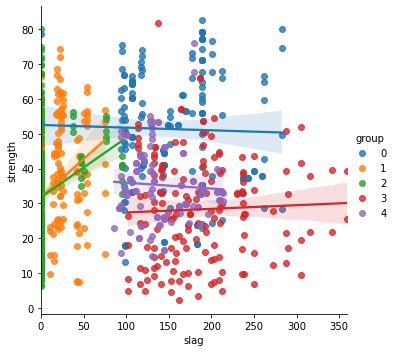

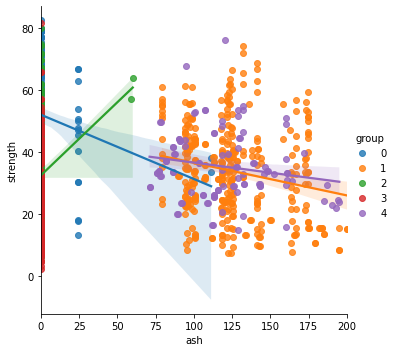

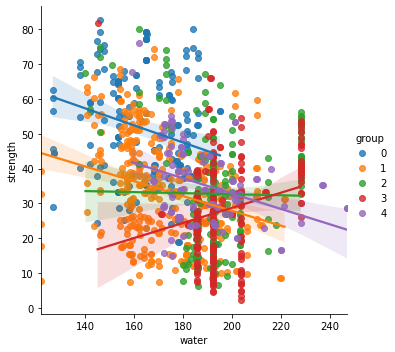

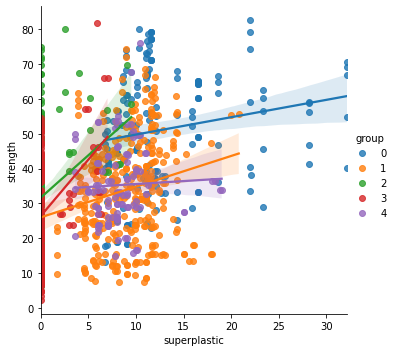

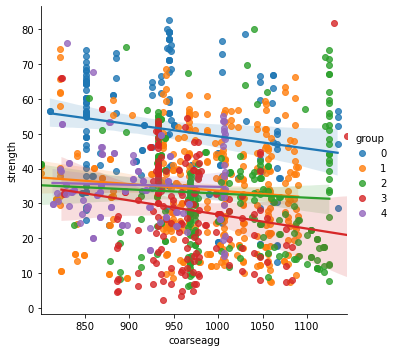

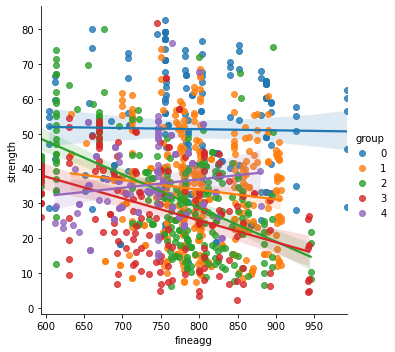

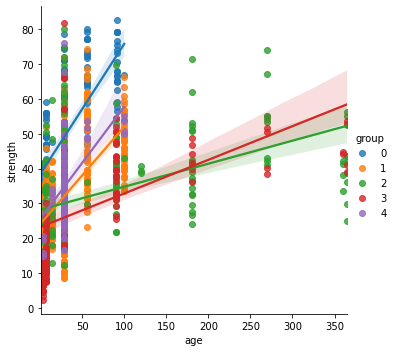

In [20]:
for col in data_copy.columns[:-2]:
  sns.lmplot(data=data_copy, x=col, y='strength', hue='group')

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold, cross_val_score

from sklearn.impute import SimpleImputer

class Regressor(object):
    def __init__(self, name, model, scale=True, include_polynomial=False, degree=2):
        self.name = name
        self.model = model
        steps = []
        if scale:
            steps.append(('scaler', StandardScaler()))
        if include_polynomial:
            steps.append(('poly_features', PolynomialFeatures(degree=degree)))
        steps.append(('model', model))
        self.steps = steps

    def get_name(self):
        return self.name

    def get_model(self):
        return self.model

    def get(self):
        return Pipeline(steps=self.steps)

    def feature_imp(self):
        try:
            return self.model.feature_importances_
        except AttributeError:
            try:
                return self.model.coef_
            except AttributeError:
                return None


class ModelsBuilder(object):
    def __init__(self, regressors, data, target, test_size=0.3, seed=42):
        self.regressors = regressors
        self.split_data = train_test_split(data.drop(target, axis=1), data[target], test_size=test_size, random_state=seed)
        self.data = data
        self.target = target

    def build(self, k_fold_splits=10):
        results = pd.DataFrame(columns=['model', 'training_score', 'test_score', 'k_fold_mean', 'k_fold_std'])
        for regressor in self.regressors:
            regressor.get().fit(self.split_data[0], self.split_data[2])
            cross_vals = cross_val_score(regressor.get(), self.data.drop(self.target, axis=1), self.data[self.target], cv=KFold(n_splits=k_fold_splits))
            mean = round(cross_vals.mean(), 3)
            std = round(cross_vals.std(), 3)
            results = results.append({
                'model': regressor.get_name(),
                'training_score': round(regressor.get().score(self.split_data[0], self.split_data[2]), 3),
                'test_score': round(regressor.get().score(self.split_data[1], self.split_data[3]),3), 
                'k_fold_mean': mean, 
                'k_fold_std': std, 
                '95% confidence intervals': str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))
                }, ignore_index=True)

        return results


class OutliersImputer(SimpleImputer):
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        super().__init__(strategy=strategy)

    def fit(self, X, y=None):
        for i in X.columns:
            q1, q2, q3 = X[i].quantile([0.25,0.5,0.75])
            IQR = q3 - q1
            a = X[i] > q3 + 1.5*IQR
            b = X[i] < q1 - 1.5*IQR
            X[i] = np.where(a | b, np.NaN, X[i])  
        return super().fit(X, y)

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

regressors = [
    Regressor('Linear Regression', LinearRegression(), scale=True), 
    Regressor('Ridge', Ridge(random_state=42), scale=True), 
    Regressor('Lasso', Lasso(random_state=42), scale=True), 
    Regressor('Decision Tree', DecisionTreeRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('Ada boosting', AdaBoostRegressor(random_state=42), scale=True),
    Regressor('Random forest', RandomForestRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('Gradient boosting', GradientBoostingRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('KNN', KNeighborsRegressor(n_neighbors=3), scale=True),
    Regressor('SVR', SVR(gamma='auto'), scale=True),
]

In [24]:
result = ModelsBuilder(regressors, data, 'strength').build()
tmp_best = result.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result = result.append(tmp_best, ignore_index=True)
result

,model,training_score,test_score,k_fold_mean,k_fold_std,95% confidence intervals
0,Linear Regression,0.627,0.585,0.592,0.073,0.449 <-> 0.735
1,Ridge,0.627,0.585,0.592,0.073,0.449 <-> 0.735
2,Lasso,0.579,0.546,0.548,0.056,0.438 <-> 0.658
3,Decision Tree,0.729,0.666,0.672,0.054,0.566 <-> 0.778
4,Ada boosting,0.824,0.769,0.781,0.030,0.722 <-> 0.84
5,Random forest,0.834,0.800,0.764,0.032,0.701 <-> 0.827
6,Gradient boosting,0.973,0.896,0.922,0.019,0.885 <-> 0.959
7,KNN,0.865,0.730,0.722,0.045,0.634 <-> 0.81
8,SVR,0.665,0.618,0.649,0.037,0.576 <-> 0.722
9,Best Model = Gradient boosting,0.973,0.896,0.922,0.019,0.885 <-> 0.959


In [25]:
q1= data.quantile(0.25)
q3= data.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((data > (q3+1.5*IQR)) | (data < (q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(data), 2)
outliers

,No. of outliers,Percentage of outliers
cement,0,0.00
slag,2,0.19
ash,0,0.00
water,9,0.87
superplastic,10,0.97
coarseagg,0,0.00
fineagg,5,0.49
age,59,5.73
strength,4,0.39


In [26]:
data[['age','superplastic']] = OutliersImputer().fit_transform(data[['age','superplastic']])

In [27]:
result_outliers_treatment = ModelsBuilder(regressors, data, 'strength').build()
tmp_best = result_outliers_treatment.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result_outliers_treatment = result_outliers_treatment.append(tmp_best, ignore_index=True)
result_outliers_treatment

,model,training_score,test_score,k_fold_mean,k_fold_std,95% confidence intervals
0,Linear Regression,0.725,0.706,0.706,0.032,0.643 <-> 0.769
1,Ridge,0.725,0.706,0.706,0.032,0.643 <-> 0.769
2,Lasso,0.696,0.686,0.679,0.032,0.616 <-> 0.742
3,Decision Tree,0.729,0.666,0.672,0.054,0.566 <-> 0.778
4,Ada boosting,0.832,0.786,0.782,0.027,0.729 <-> 0.835
5,Random forest,0.833,0.798,0.762,0.032,0.699 <-> 0.825
6,Gradient boosting,0.973,0.900,0.923,0.017,0.89 <-> 0.956
7,KNN,0.891,0.779,0.797,0.038,0.723 <-> 0.871
8,SVR,0.724,0.701,0.720,0.034,0.653 <-> 0.787
9,Best Model = Gradient boosting,0.973,0.900,0.923,0.017,0.89 <-> 0.956


In [28]:
result_feature_engg = ModelsBuilder(regressors, data.drop(['ash', 'coarseagg', 'fineagg'], axis=1), 'strength').build()
tmp_best = result_feature_engg.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result_feature_engg = result_feature_engg.append(tmp_best, ignore_index=True)
result_feature_engg

,model,training_score,test_score,k_fold_mean,k_fold_std,95% confidence intervals
0,Linear Regression,0.712,0.689,0.692,0.040,0.614 <-> 0.77
1,Ridge,0.712,0.689,0.692,0.040,0.614 <-> 0.77
2,Lasso,0.694,0.682,0.675,0.033,0.61 <-> 0.74
3,Decision Tree,0.729,0.666,0.677,0.051,0.577 <-> 0.777
4,Ada boosting,0.817,0.781,0.776,0.028,0.721 <-> 0.831
5,Random forest,0.829,0.795,0.761,0.031,0.7 <-> 0.822
6,Gradient boosting,0.966,0.894,0.918,0.019,0.881 <-> 0.955
7,KNN,0.915,0.806,0.832,0.031,0.771 <-> 0.893
8,SVR,0.776,0.753,0.762,0.030,0.703 <-> 0.821
9,Best Model = Gradient boosting,0.966,0.894,0.918,0.019,0.881 <-> 0.955


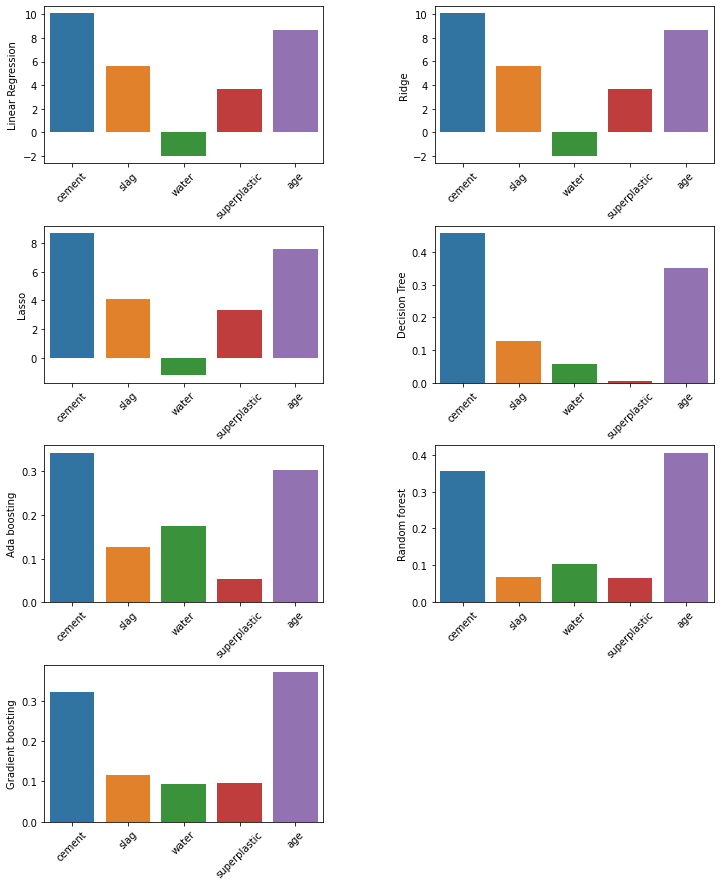

In [30]:
columns = data.drop(['ash', 'coarseagg', 'fineagg', 'strength'], axis=1).columns
feature_imp = pd.DataFrame(index=columns)
for r in regressors:
    fi = r.feature_imp()
    if fi is not None and len(fi) == len(columns):
        feature_imp[r.get_name()] = fi


plt.figure(figsize=(12, 15))
for i, col in enumerate(feature_imp.columns):
  plt.subplot(4, 2, i+1)
  ax = sns.barplot(x=feature_imp.index, y=feature_imp[col])
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  plt.subplots_adjust(hspace=0.4, wspace=0.4)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['ash', 'coarseagg', 'fineagg', 'strength'], axis=1), 
                                                   data['strength'], 
                                                   test_size = 0.2, 
                                                   random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((824, 5), (206, 5), (824,), (206,))

In [32]:
param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

In [33]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=2, cv = 10, n_iter=500)
rs.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1013 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1458 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1985 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 2592 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 3289 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 4058 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4909 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 31.8min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [34]:
mean = rs.best_score_
std = rs.cv_results_['mean_test_score'].std()

print(f"Mean training score: {rs.cv_results_['mean_train_score'].mean()}")
print(f"Mean validation score: {mean}")
print(f"Validation standard deviation: {std}")
print(f"95% confidence interval: {str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))}")
print(f"Best parameters: {rs.best_params_}")
print(f"Test score: {rs.score(X_test, y_test)}")

Mean training score: 0.9302462959271713
Mean validation score: 0.9306615192360568
Validation standard deviation: 0.04243203724564774
95% confidence interval: 0.847 <-> 1.014
Best parameters: {'subsample': 0.8, 'n_estimators': 350, 'max_leaf_nodes': 7, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.2, 'criterion': 'mse'}
Test score: 0.923403313228302
